# Questions

Fill in your name and the link to this file on your github.

* Name: Ishaan Thakker
* Link to github URL: https://github.com/ithakker/CISC367-Projects/blob/main/Day19/ml_exercises.ipynb

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import scipy

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ML: Linear Regression

So this starts with linear regression. If you want a deeper dive than what I cover in class, you can refer to [this page](https://realpython.com/linear-regression-in-python/)

The exercises come from this workbook, which has somewhat helpful explanations too: https://csmastersuh.github.io/data_analysis_with_python_2020/linear_regression.html

# Exercise 10: Linear Regression

You'll need to make up some data for this. Don't spend too much time on this one, it's less interesting compared to the others.

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

array([ 0.41798581,  2.29841393,  3.49696689,  5.19626864,  4.85166902,
        6.27163548,  5.99382674,  9.48570418,  8.44543966,  8.90421307,
       13.17094698, 12.86655338, 13.97673124, 15.38996896, 15.03868064,
       16.09391038, 19.10721694, 19.76174719, 19.08392375, 21.70697072])

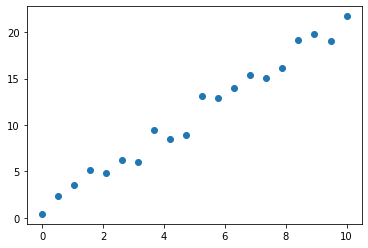

Parameters: [2.03283526] 0.9137623946091331
Coefficient: 2.0328352571261386
Intercept: 0.9137623946091331


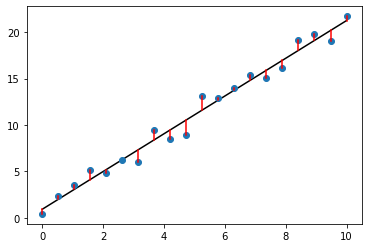

In [3]:
n=20
# Linearly increasing x values
x = np.linspace(0, 10, n)
# Wonky line of points
y = x*2 + 1 + 1*np.random.randn(n)
display(x, y)
plt.scatter(x, y)
plt.show()

# Do actual linear regression here
model = LinearRegression(fit_intercept = True)
model.fit(x[:,np.newaxis], y)
xfit = np.linspace(0,10,n)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="red");
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Exercise 11: Mystery Data

This one is far more interesting. You can download the file from [here](https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part05-e11_mystery_data/src/mystery_data.tsv). Make sure it gets the right filename!

You don't need to define any functions, as they demand, although you might find that helpful to do.

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part05-e11_mystery_data/src/mystery_data.tsv", sep = '\t')
data.head()
model = LinearRegression(fit_intercept = False)
x = data.iloc[:, 0:5]
y = data.iloc[:, 5]
model.fit(x,y)
for i, co in enumerate(model.coef_):
    print("Coefficient of X" + str(i+1) + " is " + str(co))

Coefficient of X1 is 2.9999999999999907
Coefficient of X2 is -1.0
Coefficient of X3 is 6.999999999999998
Coefficient of X4 is 4.440892098500626e-16
Coefficient of X5 is -19.999999999999996


## Exercise 12: Coefficient of Determination

Read over this entire problem, parts 1 and 2.

This reuses the same `mystery_data.tsv` file as before.

Again, you do not need to define their function. Just calculate the R2 scores and print them, as they direct.

In [ ]:
model = LinearRegression(fit_intercept = True)
x = data.iloc[:, 0:5]
y = data.iloc[:, 5]
model.fit(x, y)
scores = []
scores.append(model.score(x, y))
for i in x:
    model.fit(data[i].values.reshape(-1, 1), y)
    score = model.score(data[i].values.reshape(-1, 1), y)
    scores.append(score)

print("R2-score with feature X: " + str(scores[0]))
print("R2-score with feature X1: " + str(scores[1]))
print("R2-score with feature X2: " + str(scores[2]))
print("R2-score with feature X3: " + str(scores[3]))
print("R2-score with feature X4: " + str(scores[4]))
print("R2-score with feature X5: " + str(scores[5]))

## Exercise 13: Cycling Weather

I've already prepared the data that they require for this assignment. You can download it [here](https://gist.githubusercontent.com/acbart/466174a04e9a2505c4c25f91fc6dd4f6/raw/726865070677ec7dede17a08095624e0ea35e7cd/biking.csv).

The first column is the index, you can safely ignore it. The next 7 columns are straightforward. The last few columns are locations in Finland that have measuring stations. I recommend using `Baana` as they say in the instructions for testing.


In [16]:
data1 = pd.read_csv("https://gist.githubusercontent.com/acbart/466174a04e9a2505c4c25f91fc6dd4f6/raw/726865070677ec7dede17a08095624e0ea35e7cd/biking.csv")
data1.head()

,Unnamed: 0,Year,Precipitation amount (mm),Snow depth (cm),Air temperature (degC),Day,Month,Hour,Auroransilta,Eteläesplanadi,...,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
0,0,2017,-1.0,-1.0,0.6,1,1,276,0.0,158.0,...,285.0,168.0,107.0,249.0,156.0,229.0,155.0,103.0,0.0,218.0
1,1,2017,4.4,-1.0,-3.9,2,1,276,0.0,419.0,...,589.0,465.0,224.0,744.0,459.0,283.0,335.0,538.0,0.0,913.0
2,2,2017,6.6,7.0,-6.5,3,1,276,0.0,288.0,...,462.0,439.0,178.0,692.0,331.0,173.0,263.0,451.0,0.0,725.0
3,3,2017,-1.0,13.0,-12.8,4,1,276,0.0,232.0,...,309.0,267.0,143.0,480.0,250.0,164.0,187.0,324.0,0.0,563.0
4,4,2017,-1.0,10.0,-17.8,5,1,276,0.0,195.0,...,223.0,185.0,95.0,306.0,190.0,107.0,150.0,205.0,0.0,365.0


# ML Naive Bayes Classification

This is the next section of the exercises, from: https://csmastersuh.github.io/data_analysis_with_python_2020/bayes.html

In addition to the reading, I recommend this video: https://www.youtube.com/watch?v=CPqOCI0ahss


## Exercise 1: Blob Classification

(**OPTIONAL**) This one is very vague, and they're actually asking you to generate your own test data using the `make_blobs` function from `sklearn`'s `datasets` submodule. I've already started that work for you. But honestly if you want to skip it, I don't think it's a helpful starting question.

In [4]:
def blob_classification(X, y):
    # Put ML stuff here
    pass

# Create the training data and validation data
X, y = datasets.make_blobs(100, 2, centers=2, random_state=2, cluster_std=2.5)
# Run your ML predictions
print("The accuracy score is", blob_classification(X, y))
# Run this on some new data
a=np.array([[2, 2, 0, 2.5],
            [2, 3, 1, 1.5],
            [2, 2, 6, 3.5],
            [2, 2, 3, 1.2],
            [2, 4, 4, 2.7]])
accuracies = []
for row in a:
    X,y = datasets.make_blobs(100, int(row[0]), centers=int(row[1]),
                              random_state=int(row[2]), cluster_std=row[3])
    accuracies.append(blob_classification(X, y))
print(repr(np.hstack([a, np.array(accuracies)[:,np.newaxis]])))
# The last column should be the categorizations

The accuracy score is None
array([[2.0, 2.0, 0.0, 2.5, None],
       [2.0, 3.0, 1.0, 1.5, None],
       [2.0, 2.0, 6.0, 3.5, None],
       [2.0, 2.0, 3.0, 1.2, None],
       [2.0, 4.0, 4.0, 2.7, None]], dtype=object)


## Exercise 2: Plant Classification

This is a much better question. The Iris dataset is a classic: https://en.wikipedia.org/wiki/Iris_flower_data_set

The wikipedia page gives an example of how to load the dataset.

## Exercise 3: Word Classification

(**Skip**)

This one is too much. They give some of the data as an XML file. It's an interesting problem, and you can find the data (and solution) [here](https://github.com/AnkS4/hy-data-analysis-with-python-2020/tree/master/part06-e03_word_classification/src) if you want to tackle it, but I'm skipping it.


## Exercise 4: Spam Detection

Download [ham.txt.gz](https://github.com/AnkS4/hy-data-analysis-with-python-2020/raw/master/part06-e04_spam_detection/src/ham.txt.gz) and [spam.txt.gz](https://github.com/AnkS4/hy-data-analysis-with-python-2020/raw/master/part06-e04_spam_detection/src/spam.txt.gz).

This one is much more interesting and reasonable. It requires processing some large text files, but that's actually the easiest part, as shown in the code below. The idea is that you have spam (bad emails) and ham (good emails), and you want to determine which is which. I've done similar email processing (detecting job ads for a conference) and I was impressed with how easily I could train a little data and get very good results.

In [5]:
import gzip

# Load the spam emails as strings in a list.
with gzip.open('spam.txt.gz', 'rb') as spam_file:
    spam = spam_file.readlines()
print("Number of spam emails loaded as strings:", len(spam))

# Now do the same thing with the `ham.txt.gz`

# And then do the actual ML stuff

FileNotFoundError: [Errno 2] No such file or directory: 'spam.txt.gz'

# ML Clustering

This is the last section: https://csmastersuh.github.io/data_analysis_with_python_2020/clustering.html

This section is one of the most interesting in my opinion. K-Means is a pretty straightforward tool, and is really worth learning how to use it.

## Exercise 5: Plant Clustering

Same deal as before; use the IRIS dataset. Since this has so many parameters, it can be tricky to make a good visualization.

## Exercise 6: Non-convex Clusters

The data for this question is [here](https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part06-e06_nonconvex_clusters/src/data.tsv).

This one shows off a different clustering algorithm ([`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)), which is "Good for data which contains clusters of similar density". I wasn't very familiar with DBSCAN, but it does seem much better than KMeans. It doesn't require you to figure out the number of clusters, and seems to be tricked less by unusual data. [This page](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html) was very helpful in breaking that difference down.

The reference answer uses a `for` loop and `np.arange` to try `e` values from 0.05 to 0.2 in 0.05 increments, but I don't mind if you just manually try some different `e` values.

Please do make a visualization with clusters colored, since I think that really highlights what we are doing!

## Exercise 7: Binding Sites

Download the [`data.seq` file](https://raw.githubusercontent.com/AnkS4/hy-data-analysis-with-python-2020/master/part06-e07_binding_sites/src/data.seq); note that it is just a plain textual data file, despite the fancy extension.

They ask you to define `get_features_and_labels` to accept a filename, even though there's only one test file. Up to you if you want to hardcode the file path in or make it a flexible function.

There are multiple parts here, and they ask you to compare the euclidean and hamming distance. I think it's worth thinking about - if you don't get what they mean, do ask!

In [ ]:

# The `find_permutation` function provided in the text, for your convenience
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        # Choose the most common label among data points in the cluster
        new_label=scipy.stats.mode(real_labels[idx])[0][0]
        permutation.append(new_label)
    return permutation